In [273]:
import numpy as np
import pandas as pd
import sympy
from random import randint
import matplotlib.pyplot as plt

In [274]:
class HashSearch():

    def __init__(self):
        """
        hash_len - предоставляет информацию о длине итоговой хэш таблицы
        hash_table - результат хэш поиска в виде таблицы
        hash_array - в этом массиве хранится информация не прошедшая избавления от коллизии
        self.count_of_iterations_to_solve_collision - кол-во итераций для решения коллизии для поиска числа
        self.success_of_finding_number - удача поиска числа
        """
        self.hash_len = None
        self.hash_table = None
        self.hash_array = None
        self.count_of_iterations_to_solve_collision = 0
        self.success_of_finding_number = False
        pass

    def create_hash(self, array_of_numbers, prefered_hash_len=None):
        """
        Эта функция позволяет из массива данных создать хэш таблицу
        array_of_numbers - массив с числами
        prefered_hash_len - предпочтительная длина хэш таблицы, может быть изменена программой
                            в зависимости от минимально возможного размера таблицы
        """
        self.__init__()
        # Задаёт длину нашей будущей хэш таблицы, если нет предпочтительного значения для длины хэша,
        # То выставляем ближайшее простое число для адресного пространства хэша
        if (prefered_hash_len == None):
            if (sympy.isprime(len(array_of_numbers))):
                self.hash_len = len(array_of_numbers)
            else:
                self.hash_len = sympy.nextprime(len(array_of_numbers))
        elif (len(array_of_numbers) > prefered_hash_len):
            if (sympy.isprime(len(array_of_numbers))):
                self.hash_len = len(array_of_numbers)
            else:
                self.hash_len = sympy.nextprime(len(array_of_numbers))
        else:
            self.hash_len = prefered_hash_len

        # Инициализируем будущую хэш таблицу
        self.hash_table = pd.DataFrame(index=list(range(0, self.hash_len)), columns=["Ключ"])

        # Создаём массив, в котором хранится информация не прошедшая проверку на коллизию
        self.__initialize_hash_array(array_of_numbers)

        # А далее мы проведём решение коллизии и запишем итоговый результат в таблицу
        self.__resolution_of_collision()
        pass

    def find_number_in_hash(self, number_to_find):
        """
        Эта функция позволяет найти число или попытаться это сделать (в зависимости от хэша)
        В результате мы получим кол-во итераций на выполнение этого и успех действия
        number_to_find - число которое мы будем искать
        """
        self.success_of_finding_number = False
        # Находим индекс расположения элемента
        place_index_for_nuber = abs(number_to_find) % self.hash_len
        # создаём представление в виде массива (с ним удобнее работать при добавлении в хэш)
        array = list()
        [array.append([]) for _ in range(self.hash_len)]
        array[place_index_for_nuber].extend([number_to_find])
        self.hash_array = array
        # Если индекс в хэше свободен, то сразу записываем туда информацию
        if (self.hash_table.iloc[place_index_for_nuber, 0] != number_to_find):
            self.__resolution_of_collision_for_existing_has_to_find_number()
        # Иначе производим избавление от коллизии
        else:
            self.count_of_iterations_to_solve_collision = 0
            self.success_of_finding_number = True
        pass

    def __initialize_hash_array(self, array_of_numbers):
        """
        Функция преобразует из массива чисел массив с информацией, которая
        будет очищена от коллизии
        array_of_numbers - массив с числами
        """
        # Создаём двумерный массив
        array = list()
        [array.append([]) for _ in range(self.hash_len)]

        # После чего в зависимости от индекса массива добавляем туда информацию
        for num in array_of_numbers:
            index = abs(num) % self.hash_len
            array[index].extend([num])

        self.hash_array = array
        pass

    def __resolution_of_collision(self):
        """
        Эта функция позволяет избавиться от коллизии в self.hash_array
        По сути сделает из зубчатого массива обычную матрицу
        """
        # Проходимся по всему массиву и смотрим, есть ли там нужное нам число
        for i in range(len(self.hash_array)):
            # Если есть то забираем из массива это число
            while (len(self.hash_array[i]) > 1):
                num = self.hash_array[i].pop(-1)
                # После чего ищем для него свободное место
                # Сначала проходимся с индекса поиска по конец хэша
                for j in range(i, len(self.hash_array)):
                    if (self.hash_array[j] == []):
                        self.hash_array[j].extend([num])
                        num = None
                        break
                # А уже потом, если мы не нашли свободное место, то
                # До индекса предсшествующему начальньного индекса
                if (num != None):
                    for j in range(0, i):
                        if (self.hash_array[j] == []):
                            self.hash_array[j].extend([num])
                            num = None
                            break

        # После чего избавляемся от массивов в массиве
        # Переделывая их в другие типы данных
        for i in range(len(self.hash_array)):
            if (len(self.hash_array[i]) > 0):
                self.hash_array[i] = int(self.hash_array[i][0])
            else:
                self.hash_array[i] = ""

        # А после записываем туда информацию
        self.hash_table["Ключ"] = self.hash_array
        pass

    def __resolution_of_collision_for_existing_has_to_find_number(self):
        """
        Здесь мы решаем коллизию при добавлении нового числа (число представленное в виде массива) в хэш таблицу
        """
        # Счётчик итераций
        self.count_of_iterations_to_solve_collision = 0
        # Проходимся по всем элементам массива
        for i in range(len(self.hash_array)):
            # И пока мы не избавимся от всех элементов в этом массиве
            while (len(self.hash_array[i]) >= 1):
                # То вынимаем его от туда
                num = self.hash_array[i].pop(-1)
                # После чего ищем такое число, которое будет с ним совпадать
                # Сначала проходимся с индекса поиска по конец хэша
                for j in range(i, len(self.hash_table["Ключ"])):
                    self.count_of_iterations_to_solve_collision += 1
                    # Если находим такое число, то наша задача решена
                    if (self.hash_table.iloc[j, 0] == num):
                        num = None
                        self.success_of_finding_number = True
                        break
                # А уже потом, если мы не нашли рультат, то проходимя от начала хэша 
                # До индекса предсшествующему начальньного индекса
                if (num != None):
                    for j in range(0, i):
                        self.count_of_iterations_to_solve_collision += 1
                        # Если находим такое число, то наша задача решена
                        if (self.hash_table.iloc[j, 0] == num):
                            num = None
                            self.success_of_finding_number = True
                            break
        pass


HS = HashSearch()

In [275]:
def create_visualisation_of_experement(HS, hash_len, sd=4):
    """
    Это функция для проведения исследования и визуализации информации
    hash_len - массив с длиннами хэш таблиц
    sd - стандатное откланение для генерации чисел по формуле нормального распределния
    """
    # Объявляем массивы для кол-ва итераций и успешности нашего хэщ-поиска
    array_of_iterations = list()
    array_of_successes = list()

    # Далее проходимся по массиву длин нашего хэша
    for i in hash_len:
        # После чего случайно генерируем его и производи в нём поиск числа
        HS.create_hash(list(np.random.normal(0, sd, size=i).astype(int)))
        HS.find_number_in_hash(int(np.random.normal(0, sd)))

        # После чего записываем результаты в массивы
        array_of_iterations.extend([HS.count_of_iterations_to_solve_collision])
        array_of_successes.extend([HS.success_of_finding_number])

    # По уже созданным массивам создаём таблицу с результатми наших вычислений
    # Таблица будет состоять из столбцов кол-ва итераций и их успешности
    sr_for_iterations = pd.Series(data=array_of_iterations, index=hash_len)
    sr_for_successes = pd.Series(data=array_of_successes, index=hash_len)
    df_result = pd.DataFrame({"Кол-во итераций": sr_for_iterations, "Успех операции": sr_for_successes})
    
    # Производим вывод кол-ва неудачных поисков
    print(f"Кол-во неудач поиска значения значений в хэш: {df_result.loc[df_result['Успех операции'] == False].count()[0]}")
    # Распечатываем участи таблицы, где у нас произошёл успешный поиск и кол-во затраченных итераций > 0
    print(df_result.loc[df_result['Успех операции'] == True].loc[df_result['Кол-во итераций'] > 0])
    
    # Визуализируем информацию
    with plt.style.context('seaborn'):
            fig = plt.figure(figsize=(22,13))
            ax = fig.add_subplot()
            
            ax.plot(df_result["Кол-во итераций"], marker="H", markersize=4,
                    label="Кол-во итераций для разрешения коллизии")
            ax.plot(np.arange(0, max(hash_len)), np.arange(0, max(hash_len)), label=r'$f(x) = O(n)$')
            ax.scatter(x=df_result.loc[df_result["Успех операции"] == False].index.values, 
                       y=df_result["Кол-во итераций"].loc[df_result["Успех операции"] == False],
                       color="r", label="Неуспех поиска нового числа")
            
            ax.tick_params(axis='both', labelsize=12)
            plt.legend(fontsize=24)
            plt.show()

In [276]:
HS.create_hash([1, 2, 3, 4, 5])
HS.hash_table

,Ключ
0,5
1,1
2,2
3,3
4,4


In [277]:
HS.create_hash([3, 4, 8, 10])
HS.hash_table

,Ключ
0,10
1,8
2,
3,3
4,4


In [278]:
HS.create_hash([0, 4, 8, 10])
HS.hash_table

,Ключ
0,0
1,10
2,
3,8
4,4


In [279]:
HS.create_hash([9, 9, 9, 9])
HS.hash_table

,Ключ
0,9
1,9
2,9
3,
4,9


In [280]:
HS.create_hash([0, 4, 8, 10, 2, 5, 100, 5], 10)
HS.hash_table

,Ключ
0,0
1,100
2,2
3,10
4,4
5,5
6,5
7,
8,8
9,


In [281]:
HS.create_hash([0, 4, 8, 10, 2, 5, 100, 5], 3)
HS.hash_table

,Ключ
0,0
1,100
2,2
3,
4,4
5,5
6,5
7,
8,8
9,


In [282]:
HS.create_hash(list(np.random.randint(6, size=20)), 25)
HS.hash_table

,Ключ
0,0
1,1
2,2
3,3
4,4
5,5
6,1
7,1
8,1
9,1


In [283]:
HS.create_hash([3, 4, 8, 10], 4)
print(HS.hash_table, end='\n\n')
HS.find_number_in_hash(8)
print(HS.count_of_iterations_to_solve_collision, HS.success_of_finding_number)

   Ключ
0     4
1     8
2    10
3     3

2 True


Кол-во неудач поиска значения значений в хэш: 8
    Кол-во итераций  Успех операции
17                8            True
37               21            True
59               29            True
71               47            True
79               39            True


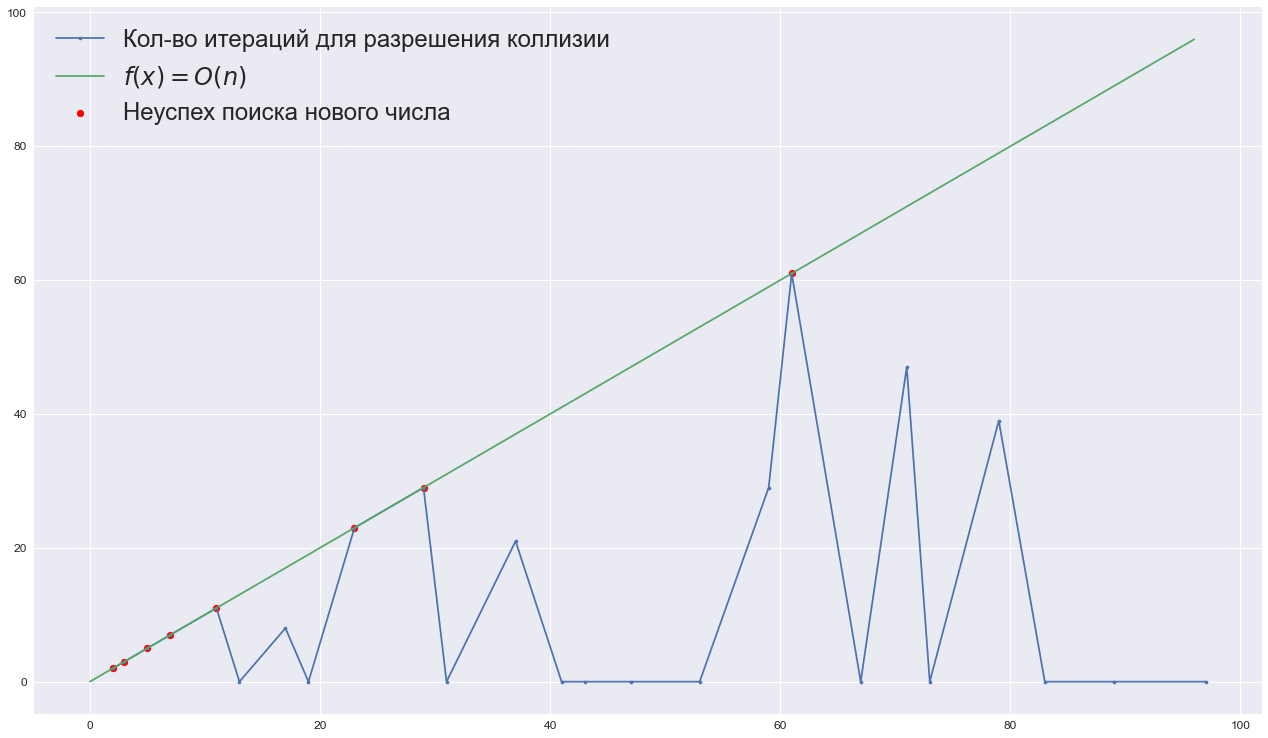

In [284]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 100)), sd=7)

Кол-во неудач поиска значения значений в хэш: 4
    Кол-во итераций  Успех операции
7                 2            True
23               16            True
31               19            True
73               23            True
79               70            True


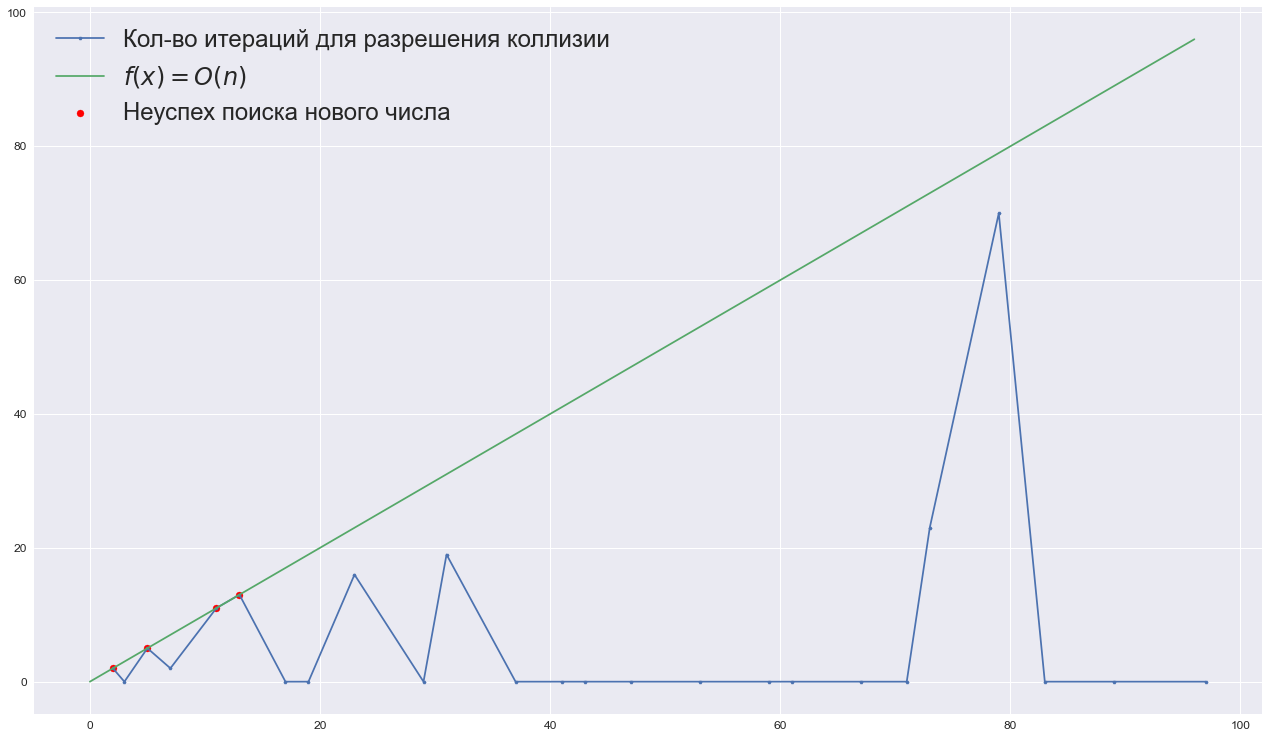

In [285]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 100)))

Кол-во неудач поиска значения значений в хэш: 5
    Кол-во итераций  Успех операции
5                 3            True
13                7            True
19                9            True
23                7            True
37               18            True
43               28            True
67               33            True
73               45            True


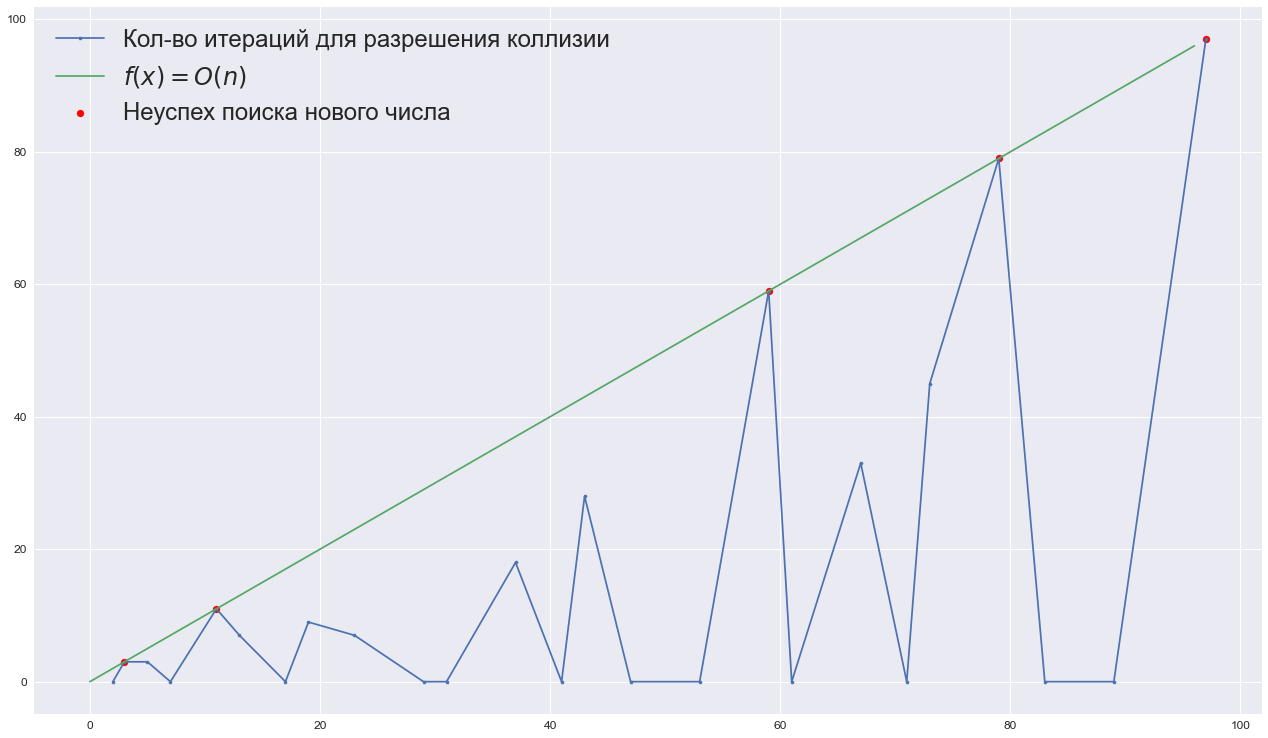

In [286]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 100)), sd=10)

Кол-во неудач поиска значения значений в хэш: 12
     Кол-во итераций  Успех операции
11                 8            True
41                30            True
67                51            True
73                49            True
79                27            True
..               ...             ...
883              311            True
907              325            True
911              781            True
919              702            True
977              134            True

[63 rows x 2 columns]


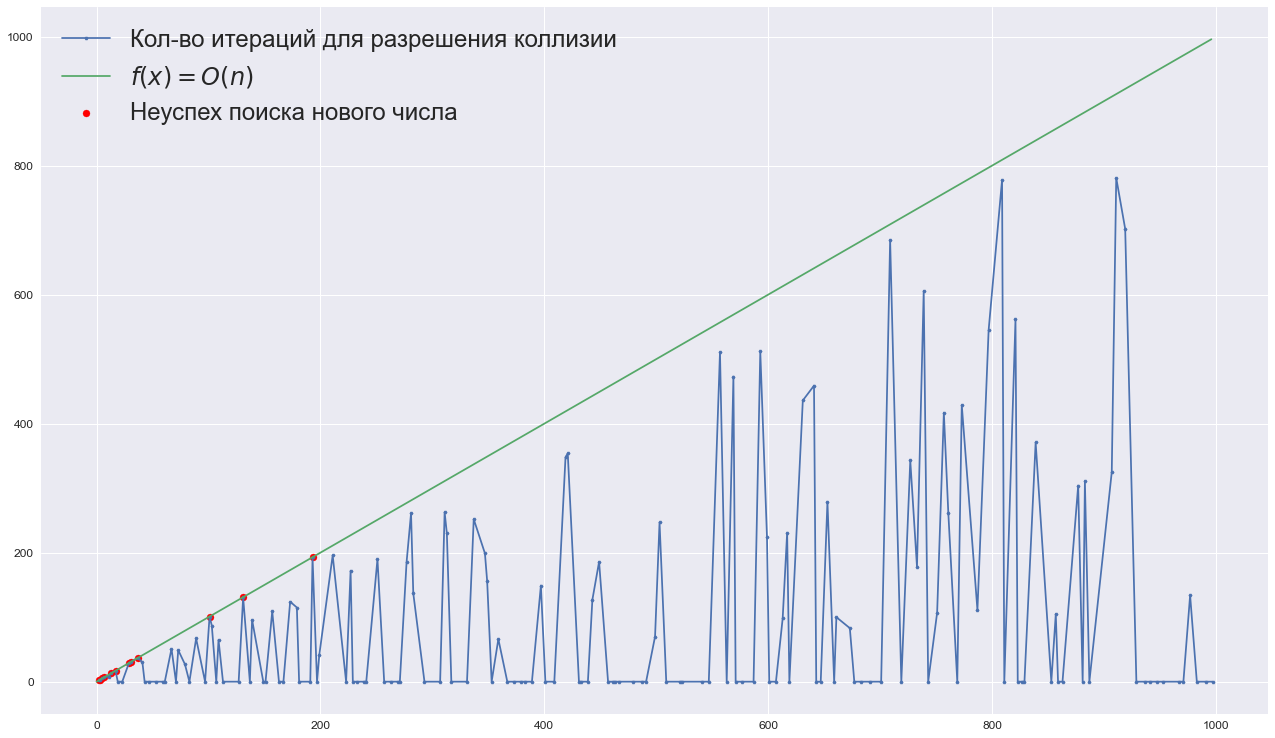

In [287]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 1000)), sd=7)

Кол-во неудач поиска значения значений в хэш: 1
      Кол-во итераций  Успех операции
263               246            True
1213             1144            True
1229             1181            True
1327             1272            True
1429             1370            True
1733             1649            True
1787             1710            True


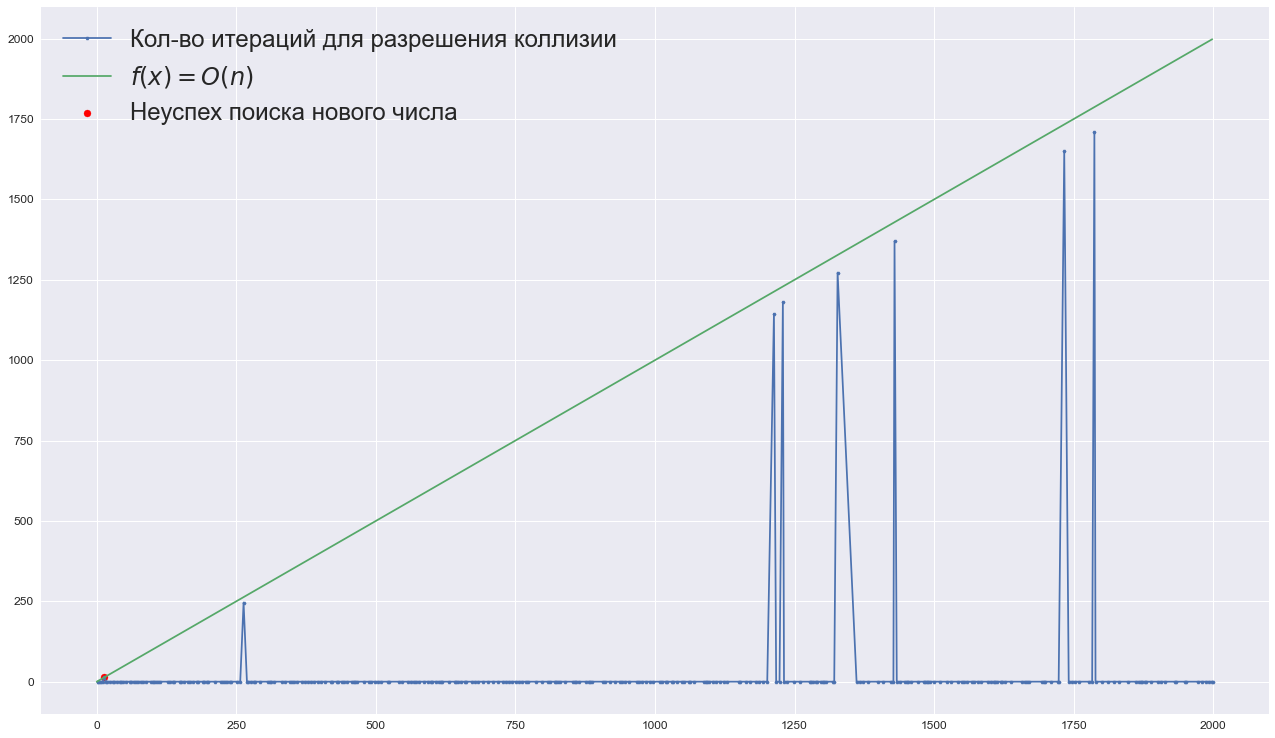

In [288]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=0.5)

Кол-во неудач поиска значения значений в хэш: 6
      Кол-во итераций  Успех операции
11                  7            True
41                 18            True
47                 24            True
53                 31            True
97                 39            True
...               ...             ...
1907              737            True
1951              764            True
1973              722            True
1997              764            True
1999              770            True

[97 rows x 2 columns]


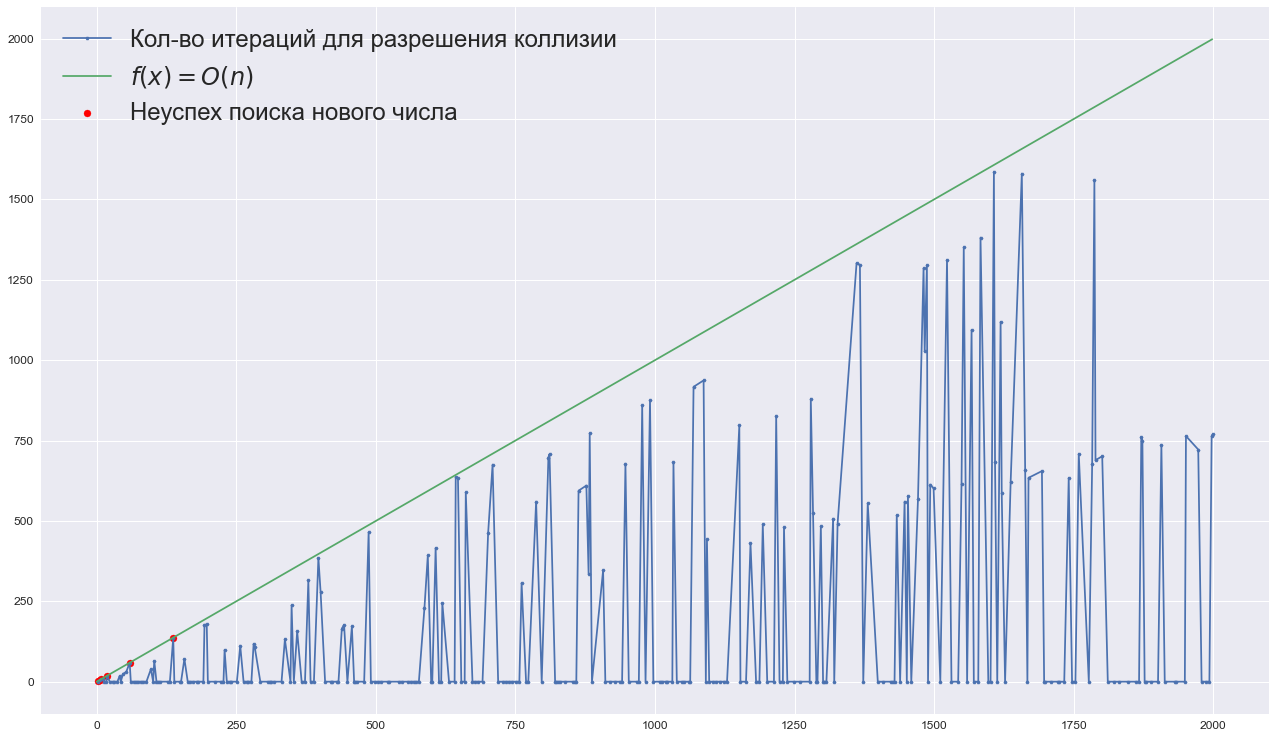

In [289]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=2)

Кол-во неудач поиска значения значений в хэш: 6
      Кол-во итераций  Успех операции
29                 21            True
37                 15            True
41                 27            True
61                 30            True
67                 51            True
...               ...             ...
1931             1661            True
1949             1571            True
1951              377            True
1993              384            True
1997             1613            True

[117 rows x 2 columns]


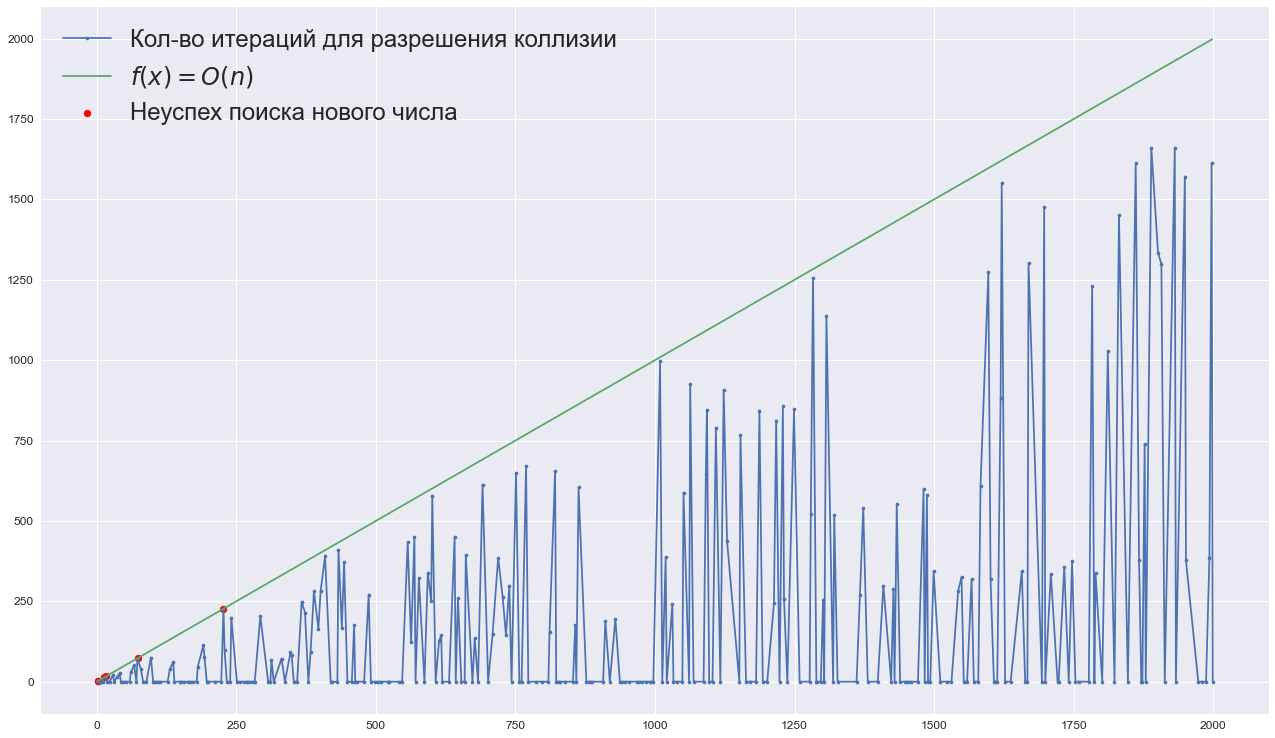

In [290]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=4)

Кол-во неудач поиска значения значений в хэш: 8
      Кол-во итераций  Успех операции
31                 17            True
47                 34            True
67                 28            True
79                 57            True
89                 61            True
...               ...             ...
1907              619            True
1913             1539            True
1949              246            True
1993             1390            True
1999             1515            True

[138 rows x 2 columns]


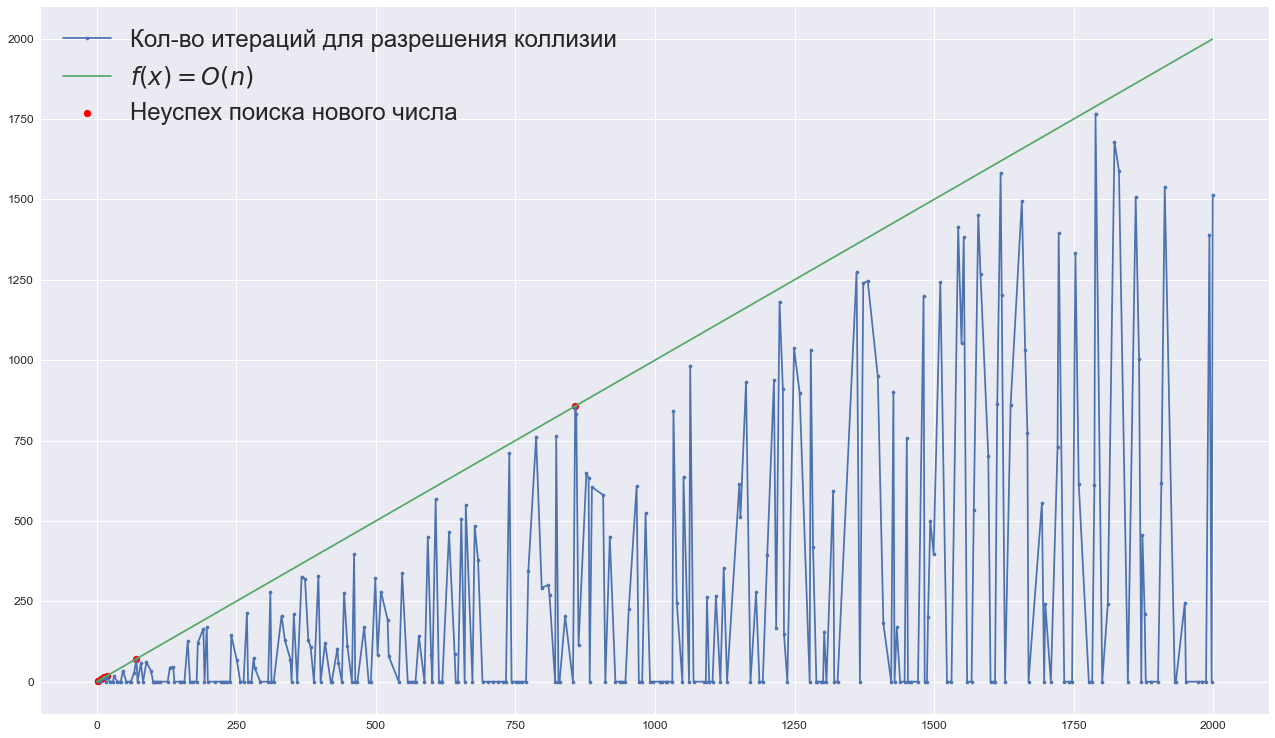

In [291]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=7)

Кол-во неудач поиска значения значений в хэш: 23
      Кол-во итераций  Успех операции
23                 13            True
71                 44            True
73                 25            True
89                 41            True
101                36            True
...               ...             ...
1951              937            True
1973             1490            True
1987             1788            True
1997              240            True
1999              275            True

[149 rows x 2 columns]


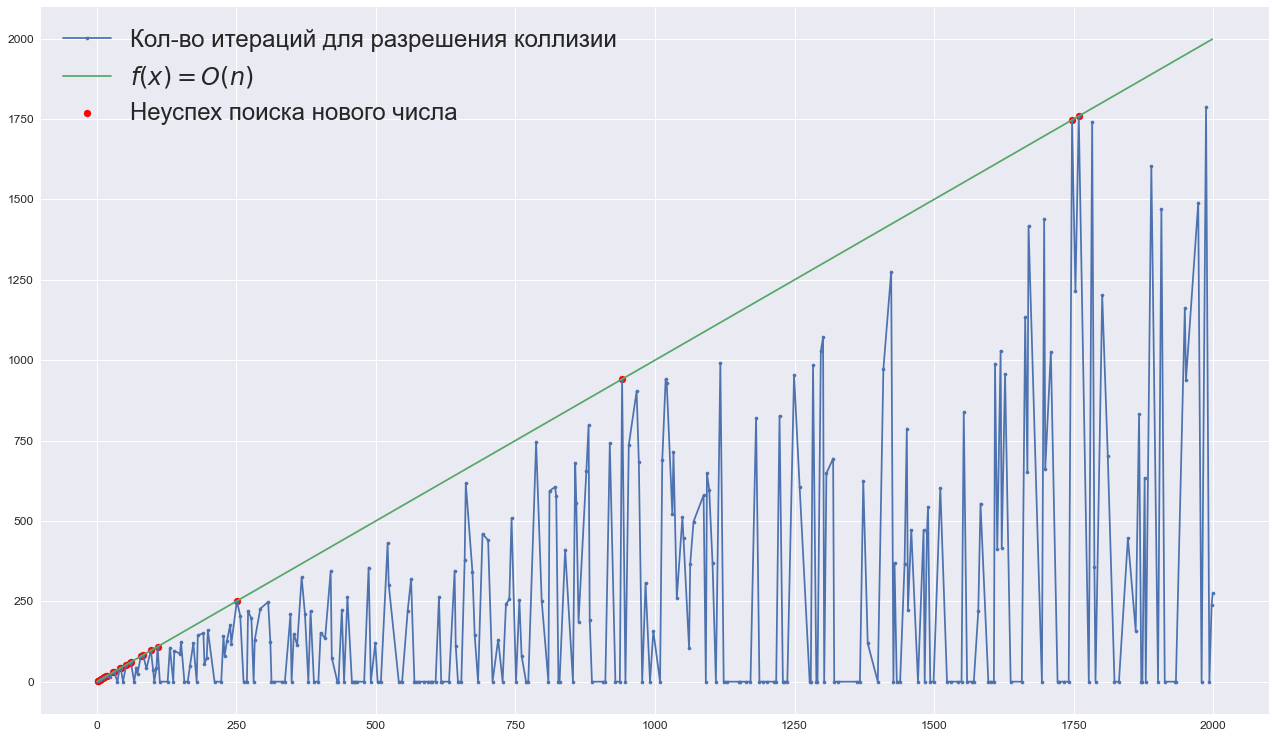

In [292]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=14)

Кол-во неудач поиска значения значений в хэш: 50
      Кол-во итераций  Успех операции
13                 12            True
37                  5            True
59                 18            True
97                 29            True
131                28            True
...               ...             ...
1931             1040            True
1933             1491            True
1949             1167            True
1987              394            True
1999              271            True

[117 rows x 2 columns]


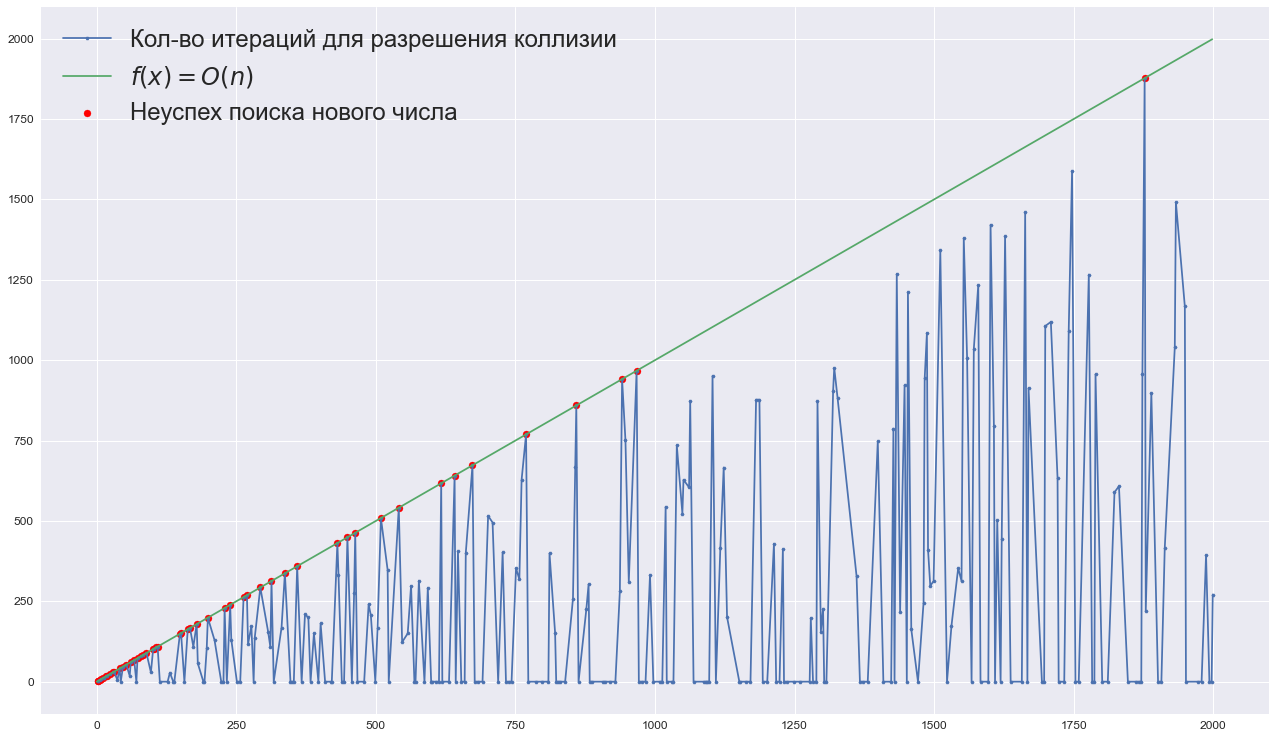

In [293]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=50)

Кол-во неудач поиска значения значений в хэш: 196
      Кол-во итераций  Успех операции
331                42            True
359                84            True
433                66            True
569                94            True
593               120            True
601                25            True
661               159            True
727               196            True
757               249            True
823               330            True
937               188            True
1009              409            True
1063              203            True
1123              476            True
1163              475            True
1181              604            True
1381              742            True
1459              787            True
1487              744            True
1493              766            True
1499              437            True
1511              784            True
1543              894            True
1583              823            True


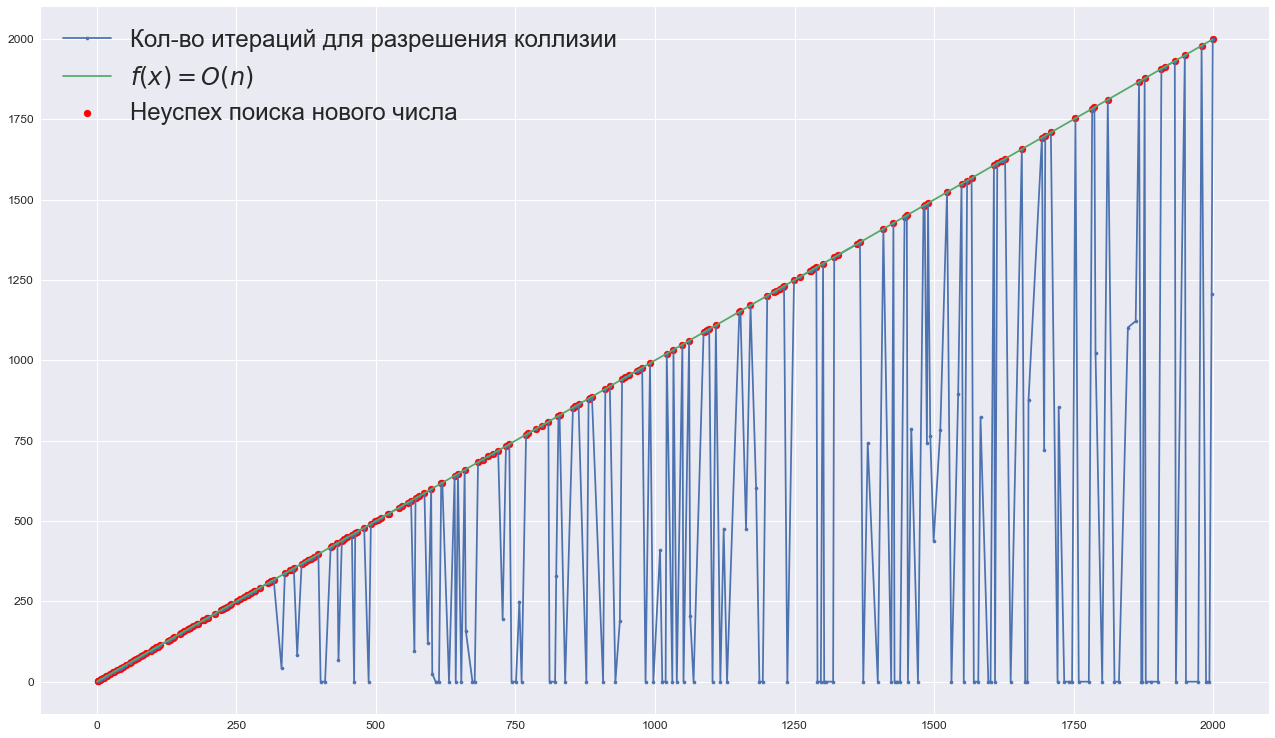

In [294]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=500)